# Analysis Model NoteBook
OOF の 分析

## Import

In [37]:
import os, sys
import warnings
import glob

from tqdm import tqdm 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_colwidth = 250
pd.options.display.max_rows = 45
warnings.filterwarnings("ignore")

# インライン表示
%matplotlib inline

## OOF CSV

In [55]:
FOLDS = 5
# `/`` まで必要
DIR_TARGETS = [
    '../../train/output/flood/A_V5_clean-v3_timmu_IMG1312_hrnet_w30_fl-tr_b8/',
    '../../train/output/flood/3090_V1_IMG1280_flip-trans/',
    '../../train/output/flood/3090_V5_clean-v3__timmu_IMG1312_hrnet_w18_fl-tr_b4/',
]
THRESHOLDS = [
    0.4,
    0.45,
    0.4,
]

In [56]:
# constant
CHANNELS_FLOOD = ['non-flooded building', 'flooded building', 'non-flooded road', 'flooded road']

In [57]:
dfs = []
for i, DIR_TARGET in enumerate(DIR_TARGETS):
    for fold in range(FOLDS):
        env = DIR_TARGET.split('/')[-2].split('_')[0]
        PATH_CSV = f'{DIR_TARGET}{env}_fold-{fold}/oof_fold{fold}_threshold{THRESHOLDS[i]}.csv'
        print(PATH_CSV)
        df = pd.read_csv(PATH_CSV)
        df['fold'] = fold
        df['exp'] = DIR_TARGET.split('/')[-2]
        dfs.append(df)
    
df = pd.concat(dfs).reindex()

../../train/output/flood/A_V5_clean-v3_timmu_IMG1312_hrnet_w30_fl-tr_b8/A_fold-0/oof_fold0_threshold0.4.csv
../../train/output/flood/A_V5_clean-v3_timmu_IMG1312_hrnet_w30_fl-tr_b8/A_fold-1/oof_fold1_threshold0.4.csv
../../train/output/flood/A_V5_clean-v3_timmu_IMG1312_hrnet_w30_fl-tr_b8/A_fold-2/oof_fold2_threshold0.4.csv
../../train/output/flood/A_V5_clean-v3_timmu_IMG1312_hrnet_w30_fl-tr_b8/A_fold-3/oof_fold3_threshold0.4.csv
../../train/output/flood/A_V5_clean-v3_timmu_IMG1312_hrnet_w30_fl-tr_b8/A_fold-4/oof_fold4_threshold0.4.csv
../../train/output/flood/3090_V1_IMG1280_flip-trans/3090_fold-0/oof_fold0_threshold0.45.csv
../../train/output/flood/3090_V1_IMG1280_flip-trans/3090_fold-1/oof_fold1_threshold0.45.csv
../../train/output/flood/3090_V1_IMG1280_flip-trans/3090_fold-2/oof_fold2_threshold0.45.csv
../../train/output/flood/3090_V1_IMG1280_flip-trans/3090_fold-3/oof_fold3_threshold0.45.csv
../../train/output/flood/3090_V1_IMG1280_flip-trans/3090_fold-4/oof_fold4_threshold0.45.csv


## Analysis

In [58]:
df

,filename,channel,tp,fp,fn,union,precision,recall,f1,iou,...,non-flooded road_mean_iou,flooded road_mean_tp,flooded road_mean_fp,flooded road_mean_fn,flooded road_mean_precision,flooded road_mean_recall,flooded road_mean_f1,flooded road_mean_iou,fold,exp
0,../../data/Germany_Training_Public/PRE-event/10500500C4DD7000_0_23_70.tif,non-flooded building,4543,2513,3519,10575.0,0.643849,0.563508,0.601000,0.428900,...,0.517644,435330,723748,148410,0.375583,0.745760,0.499566,0.332951,0,A_V5_clean-v3_timmu_IMG1312_hrnet_w30_fl-tr_b8
1,../../data/Germany_Training_Public/PRE-event/10500500C4DD7000_0_23_70.tif,flooded building,0,0,0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.517644,435330,723748,148410,0.375583,0.745760,0.499566,0.332951,0,A_V5_clean-v3_timmu_IMG1312_hrnet_w30_fl-tr_b8
2,../../data/Germany_Training_Public/PRE-event/10500500C4DD7000_0_23_70.tif,non-flooded road,10681,40002,12906,63589.0,0.210741,0.452834,0.287622,0.167924,...,0.517644,435330,723748,148410,0.375583,0.745760,0.499566,0.332951,0,A_V5_clean-v3_timmu_IMG1312_hrnet_w30_fl-tr_b8
3,../../data/Germany_Training_Public/PRE-event/10500500C4DD7000_0_23_70.tif,flooded road,0,2805,25480,28285.0,0.000000,0.000000,0.000000,0.000000,...,0.517644,435330,723748,148410,0.375583,0.745760,0.499566,0.332951,0,A_V5_clean-v3_timmu_IMG1312_hrnet_w30_fl-tr_b8
4,../../data/Germany_Training_Public/PRE-event/10500500C4DD7000_0_35_59.tif,non-flooded building,558,10,307,875.0,0.982394,0.645087,0.778781,0.625411,...,0.517644,435330,723748,148410,0.375583,0.745760,0.499566,0.332951,0,A_V5_clean-v3_timmu_IMG1312_hrnet_w30_fl-tr_b8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,../../data/Louisiana-East_Training_Public/PRE-event/105001001A0FFC00_0_20_12.tif,flooded road,0,0,0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.534087,447267,310316,436282,0.590387,0.506216,0.545066,0.374638,4,3090_V5_clean-v3__timmu_IMG1312_hrnet_w18_fl-tr_b4
636,../../data/Louisiana-East_Training_Public/PRE-event/10400100684A4B00_1_7_85.tif,non-flooded building,2948,61,607,3616.0,0.979727,0.829255,0.898228,0.811403,...,0.534087,447267,310316,436282,0.590387,0.506216,0.545066,0.374638,4,3090_V5_clean-v3__timmu_IMG1312_hrnet_w18_fl-tr_b4
637,../../data/Louisiana-East_Training_Public/PRE-event/10400100684A4B00_1_7_85.tif,flooded building,0,0,0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.534087,447267,310316,436282,0.590387,0.506216,0.545066,0.374638,4,3090_V5_clean-v3__timmu_IMG1312_hrnet_w18_fl-tr_b4
638,../../data/Louisiana-East_Training_Public/PRE-event/10400100684A4B00_1_7_85.tif,non-flooded road,10802,16564,7730,35096.0,0.394723,0.582884,0.470691,0.307633,...,0.534087,447267,310316,436282,0.590387,0.506216,0.545066,0.374638,4,3090_V5_clean-v3__timmu_IMG1312_hrnet_w18_fl-tr_b4


In [59]:
METRICSES = [
    'tp', 'fp',
    'recall', 'f1',
    'iou'
]

c='non-flooded building' metrics='tp'


count      2403.000000
mean      20410.473159
std       49373.944290
min           0.000000
25%           0.000000
50%         742.000000
75%       12736.500000
max      335373.000000
Name: tp, dtype: float64

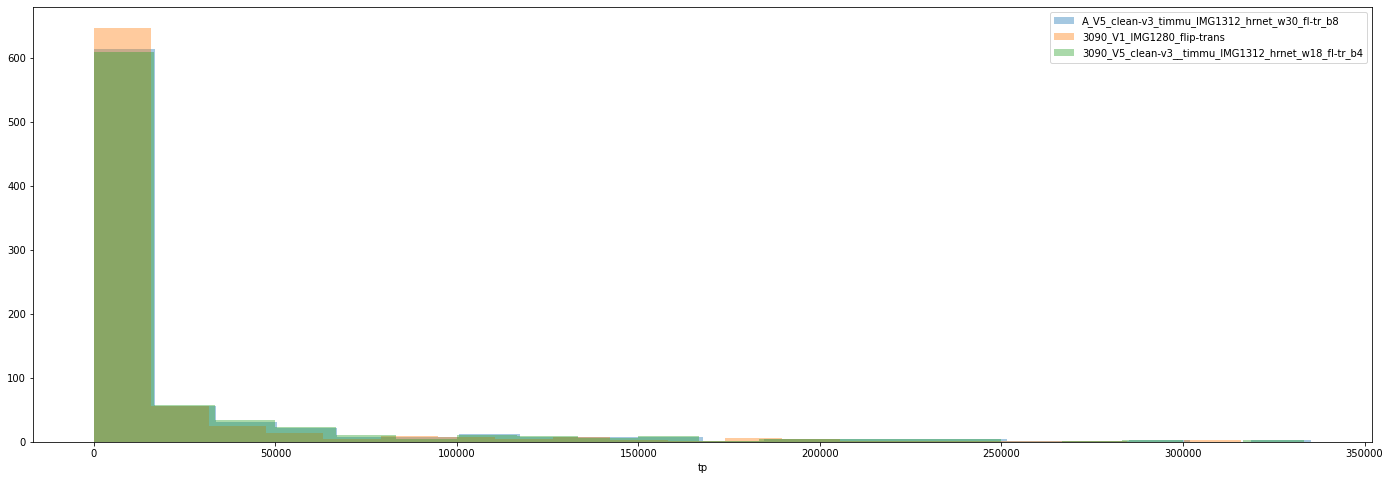

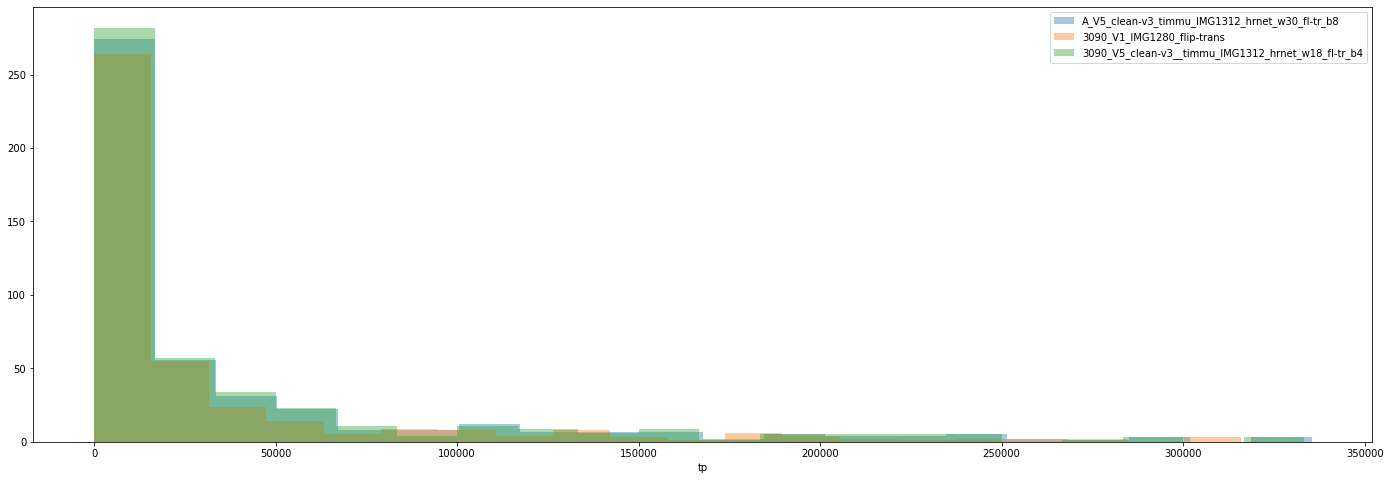

c='flooded building' metrics='tp'


count      2403.000000
mean       1939.513109
std        9679.210338
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      158996.000000
Name: tp, dtype: float64

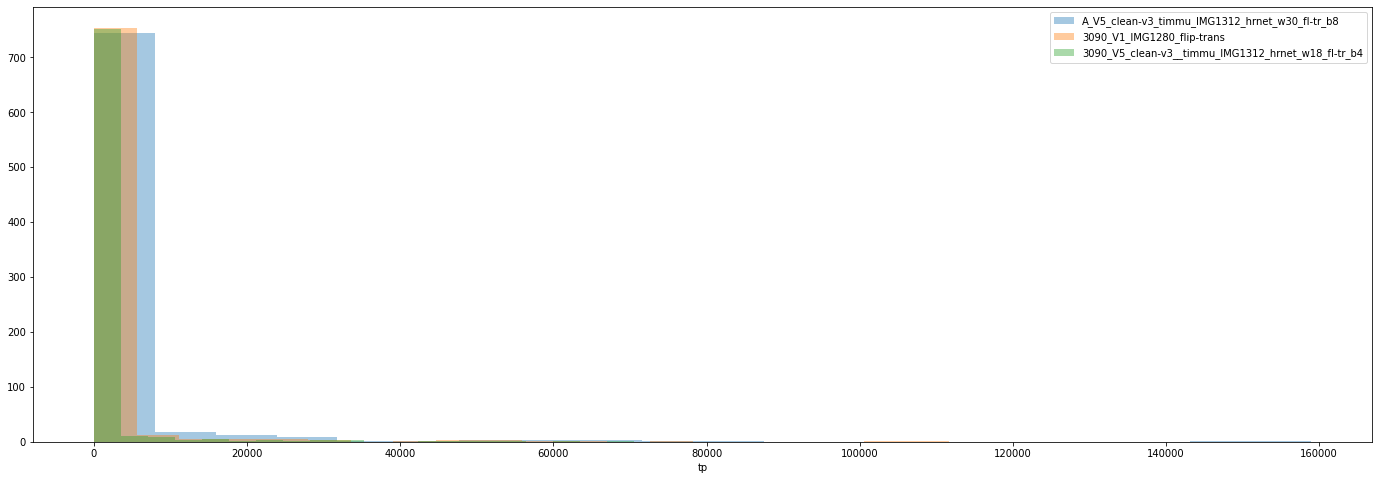

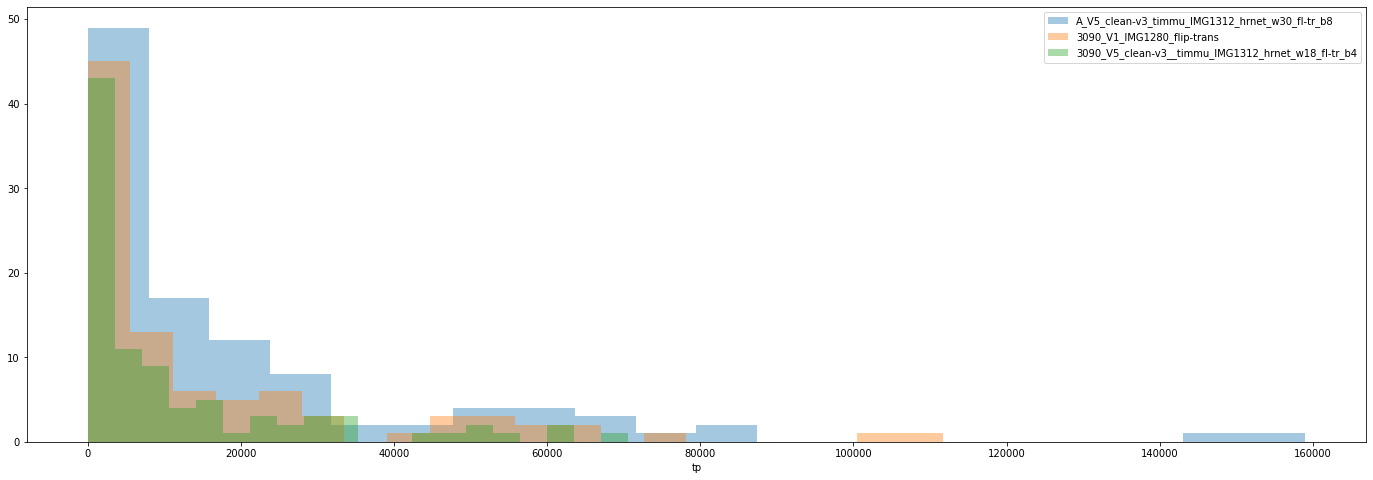

c='non-flooded road' metrics='tp'


count      2403.000000
mean      21178.492301
std       26150.343632
min           0.000000
25%        1439.000000
50%       12254.000000
75%       29383.500000
max      159787.000000
Name: tp, dtype: float64

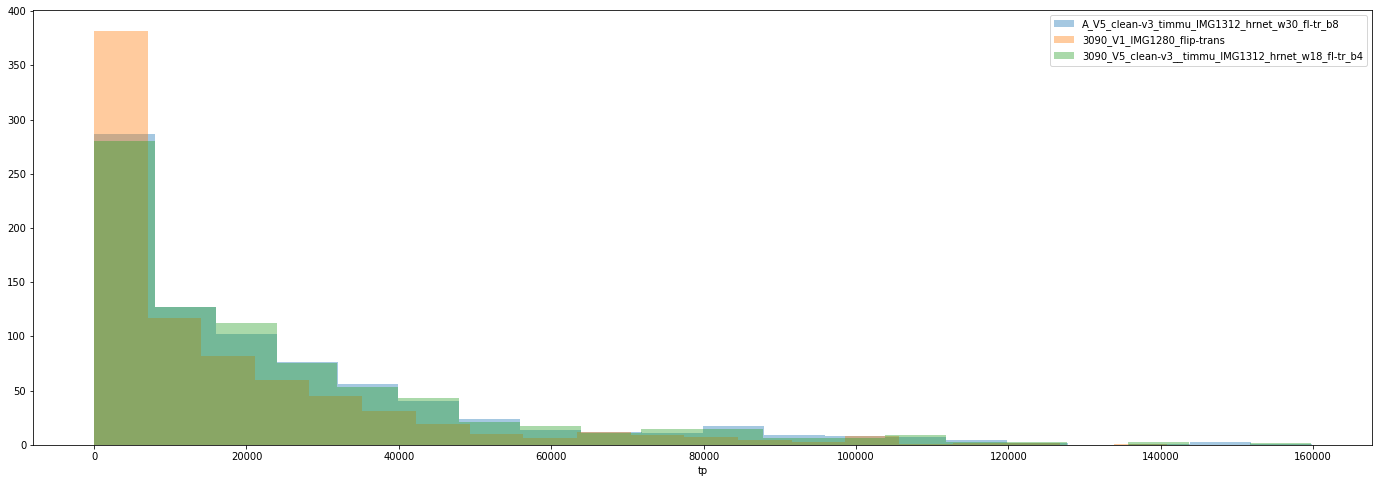

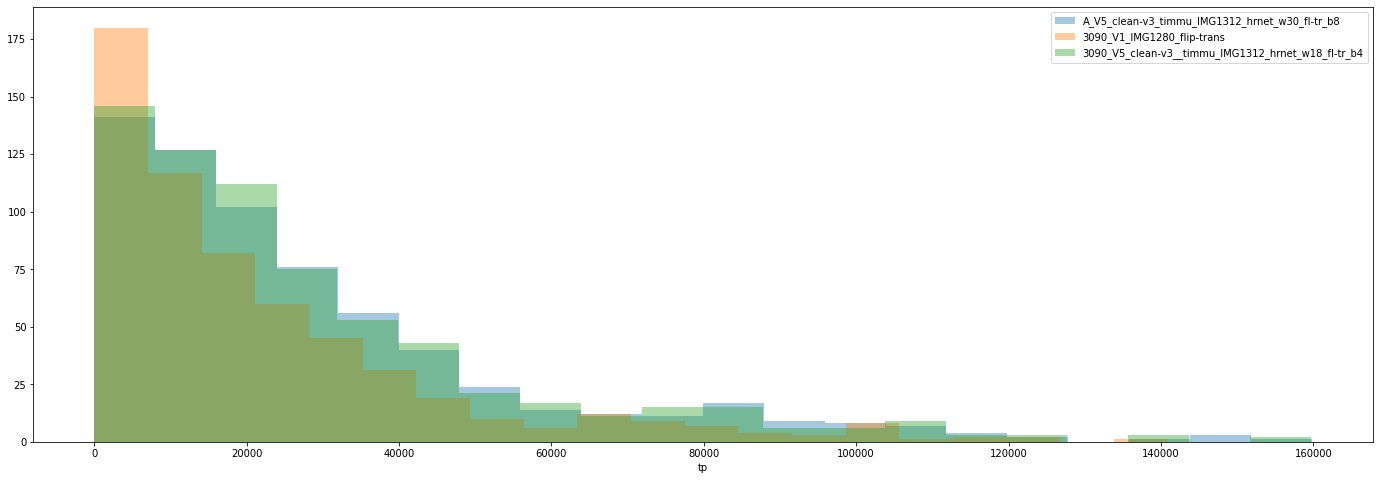

c='flooded road' metrics='tp'


count     2403.000000
mean      3145.046608
std       9699.480176
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      89367.000000
Name: tp, dtype: float64

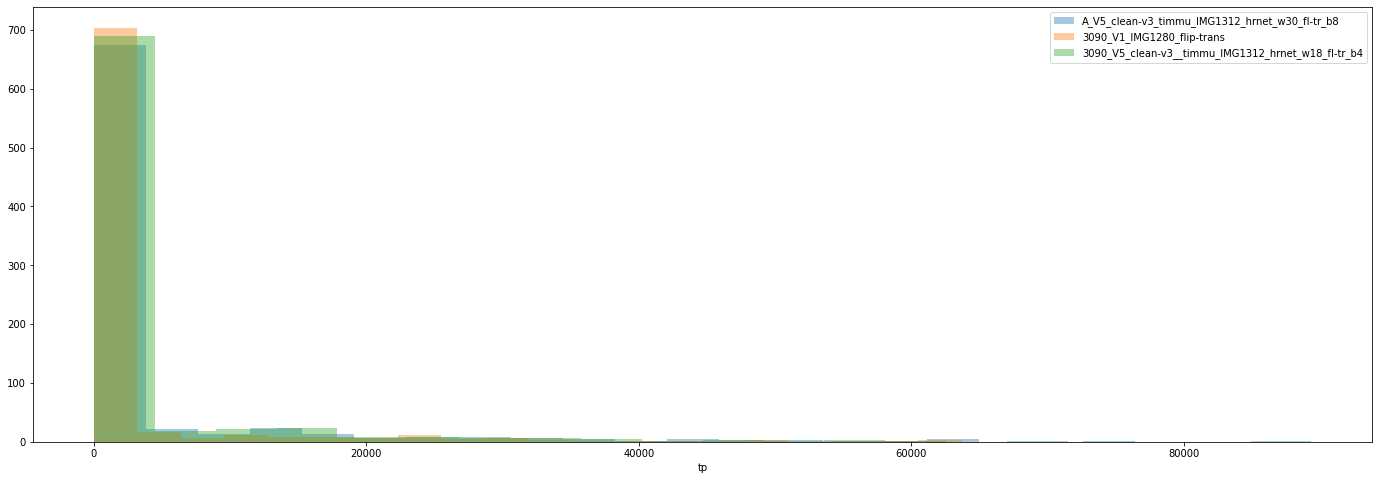

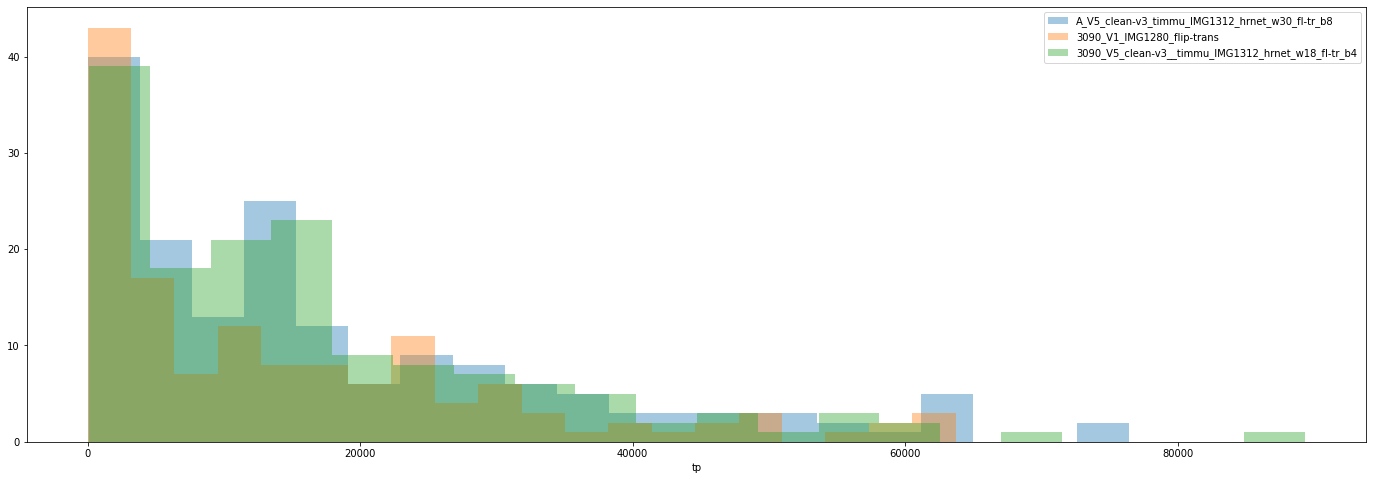

c='non-flooded building' metrics='fp'


count      2403.000000
mean       6712.523096
std       16271.822479
min           0.000000
25%           0.000000
50%         560.000000
75%        5606.500000
max      266265.000000
Name: fp, dtype: float64

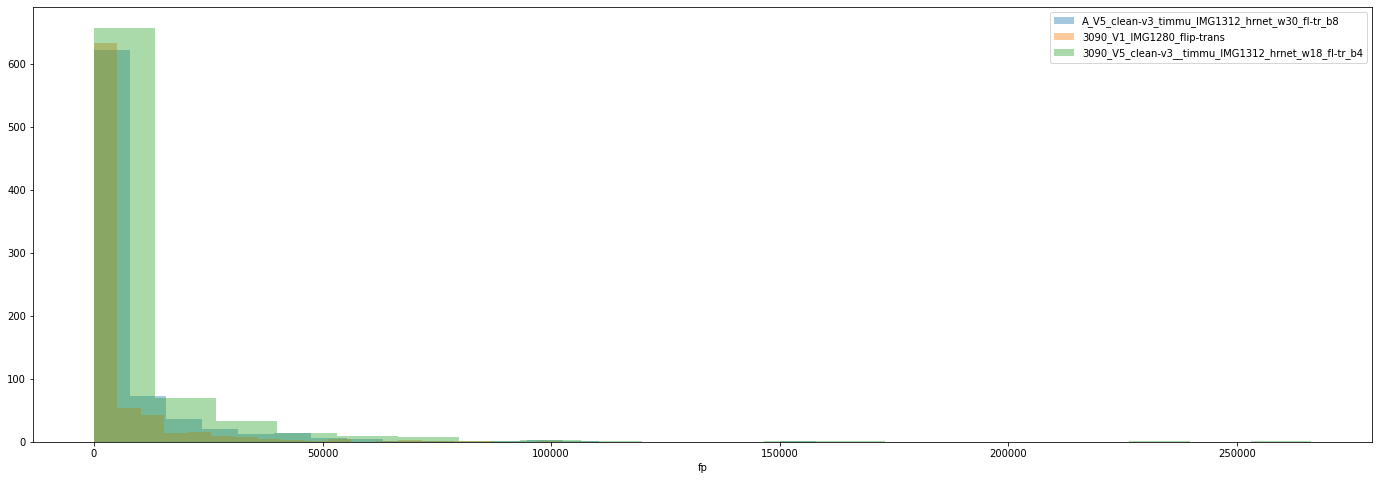

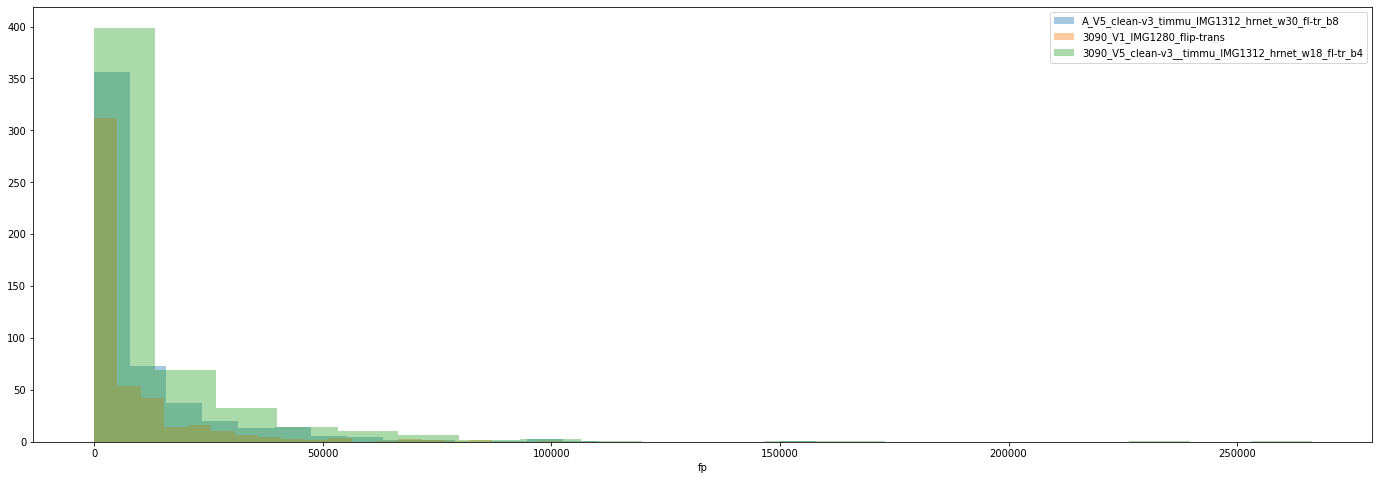

c='flooded building' metrics='fp'


count      2403.000000
mean       1361.000416
std        8988.385999
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      261505.000000
Name: fp, dtype: float64

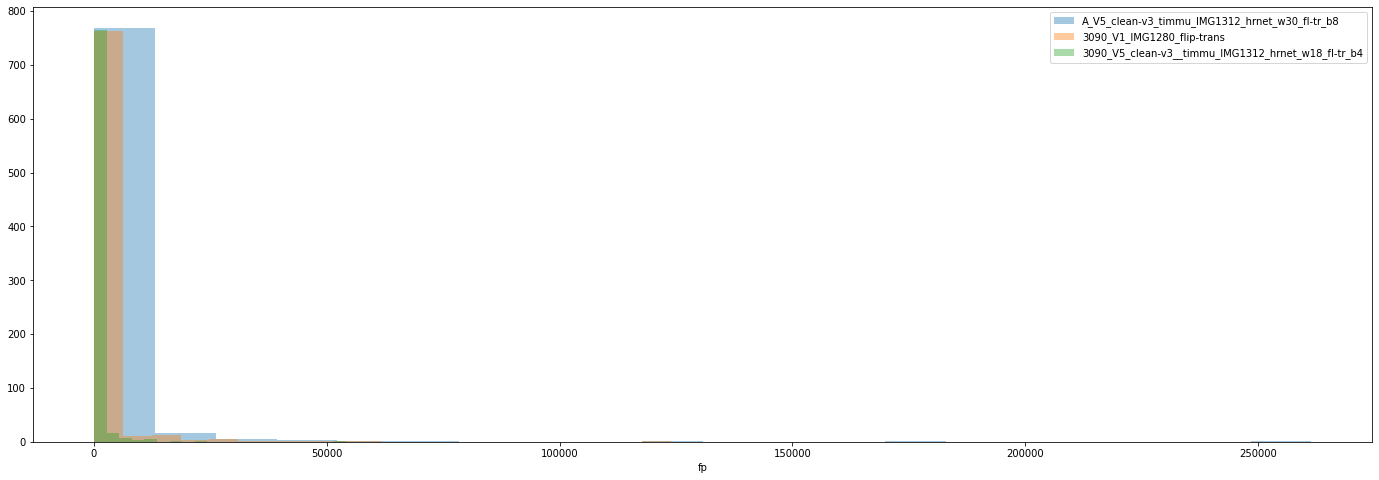

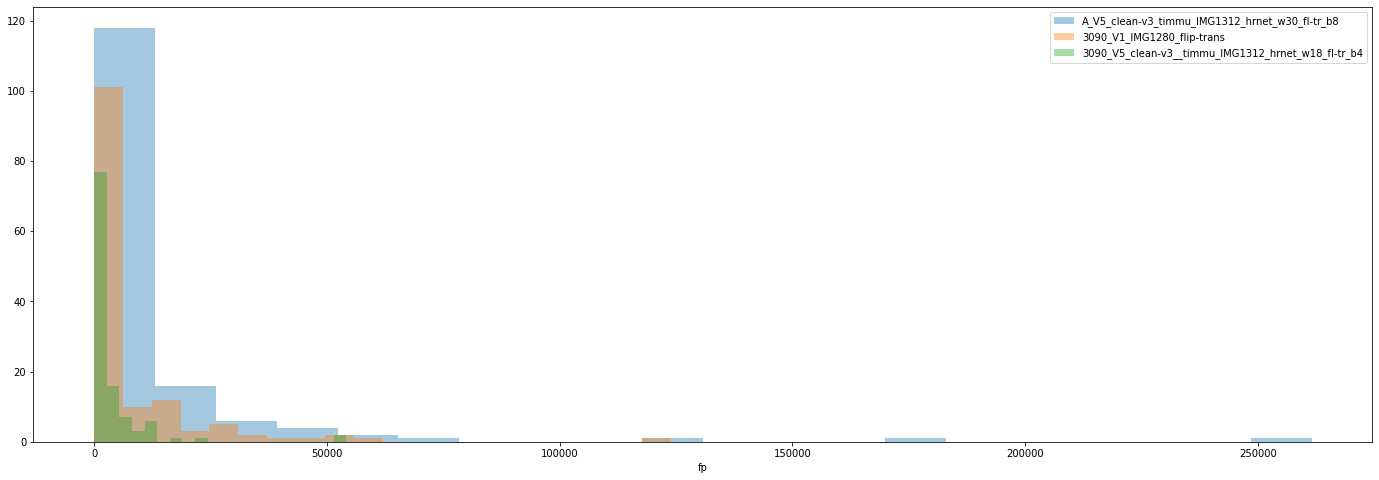

c='non-flooded road' metrics='fp'


count      2403.000000
mean      10080.428631
std       12490.270105
min           0.000000
25%        1543.000000
50%        5595.000000
75%       13703.500000
max      108399.000000
Name: fp, dtype: float64

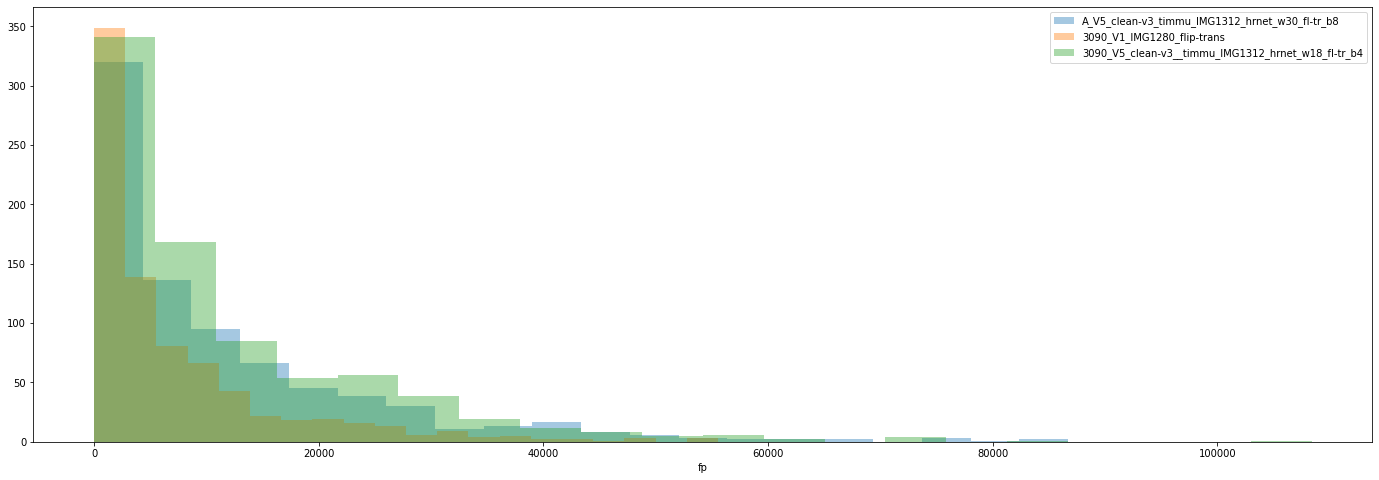

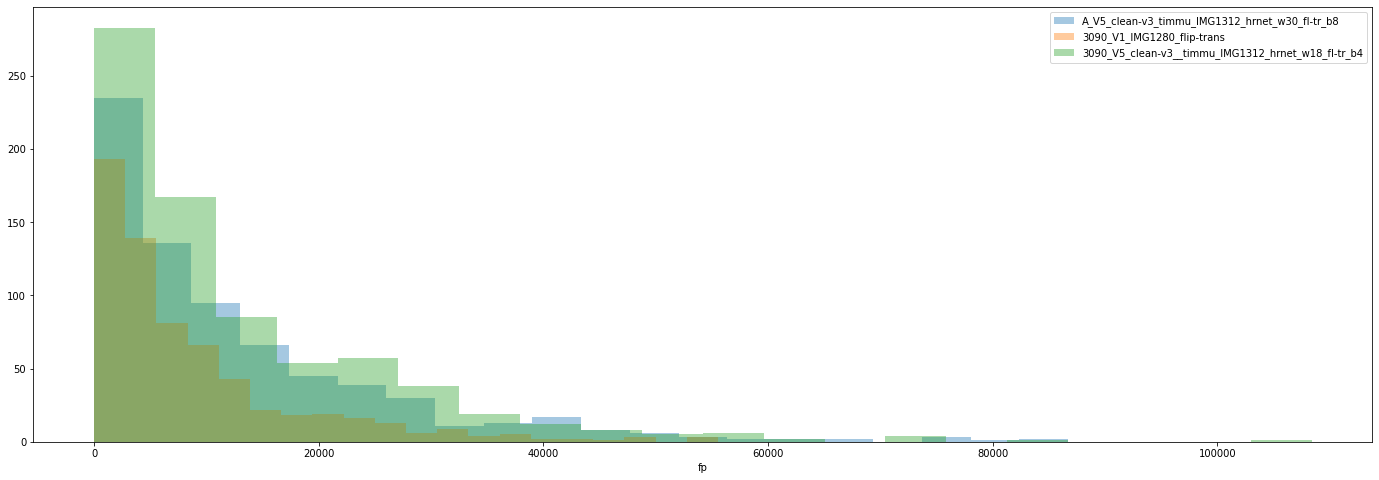

c='flooded road' metrics='fp'


count      2403.000000
mean       2363.769039
std        7598.108062
min           0.000000
25%           0.000000
50%           0.000000
75%         256.000000
max      100473.000000
Name: fp, dtype: float64

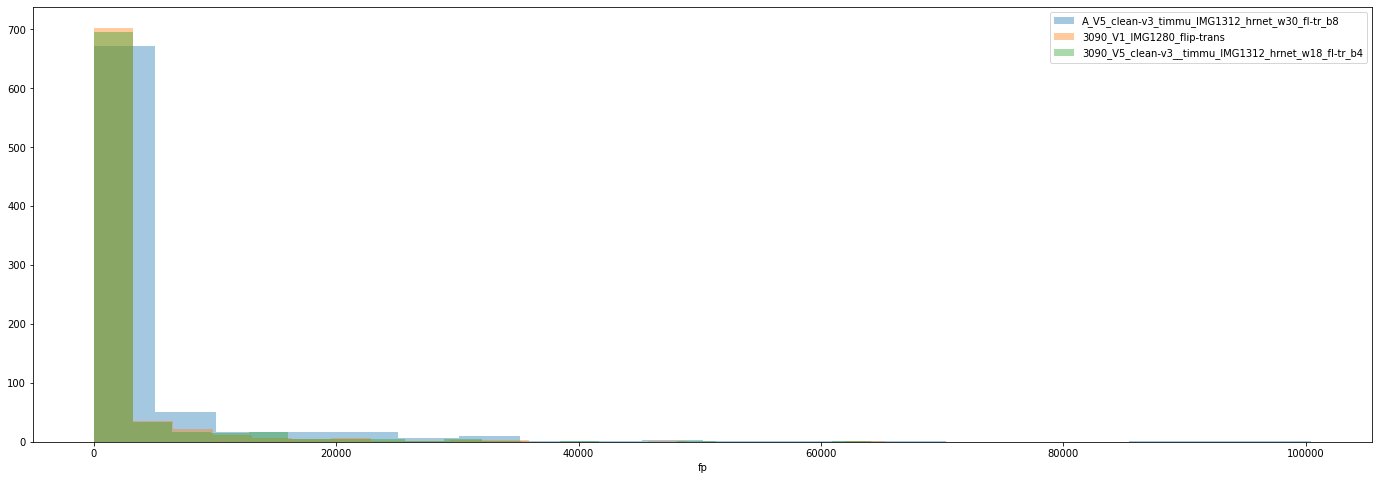

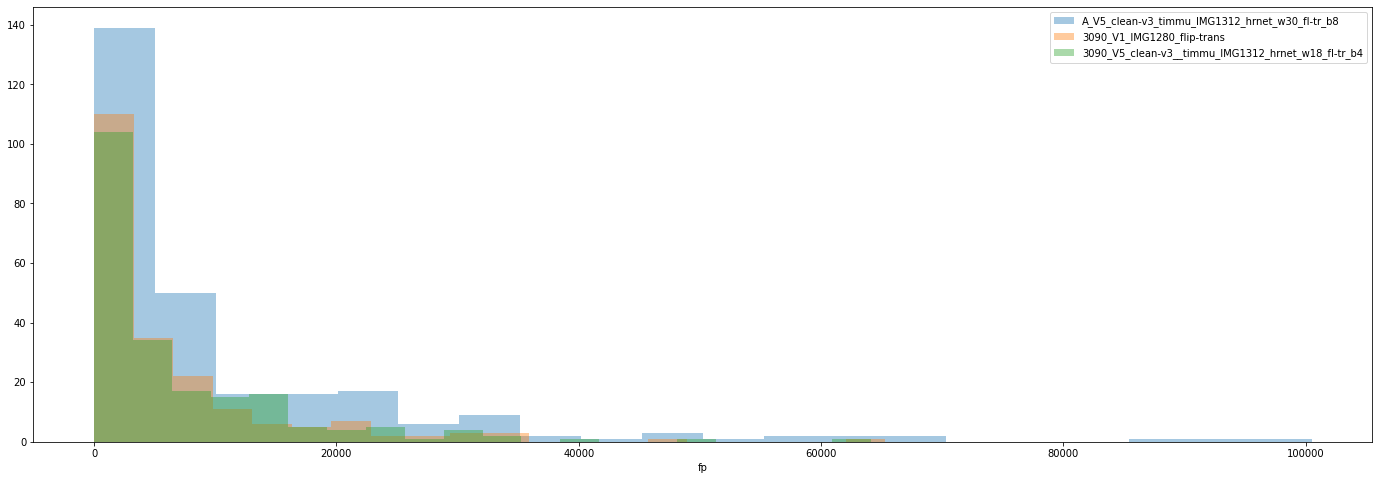

c='non-flooded building' metrics='recall'


count    2403.000000
mean        0.412991
std         0.404018
min         0.000000
25%         0.000000
50%         0.406049
75%         0.838756
max         1.000000
Name: recall, dtype: float64

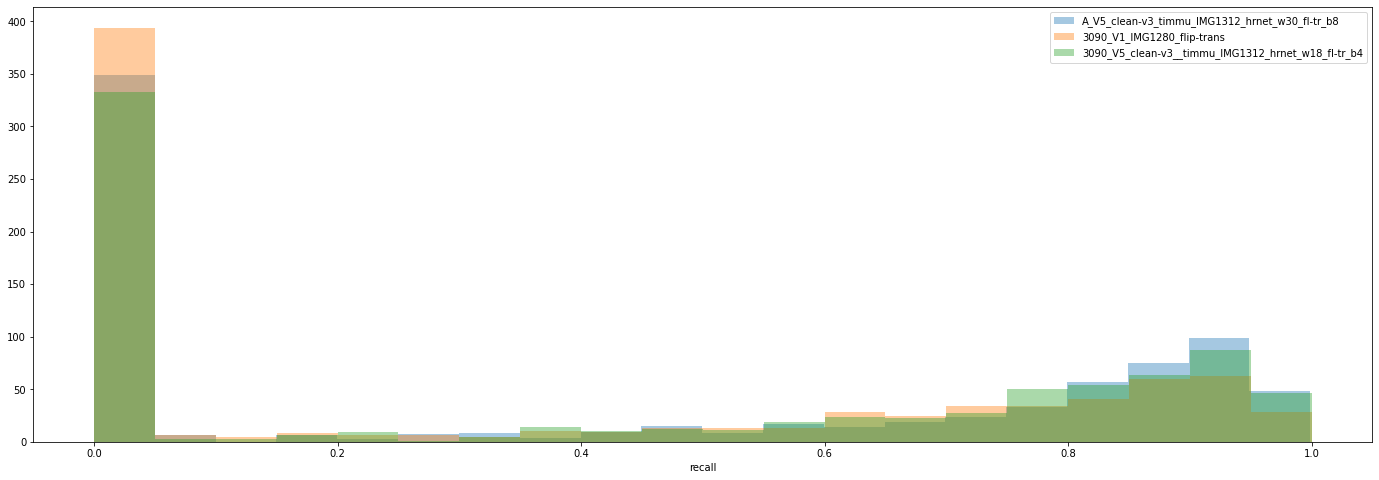

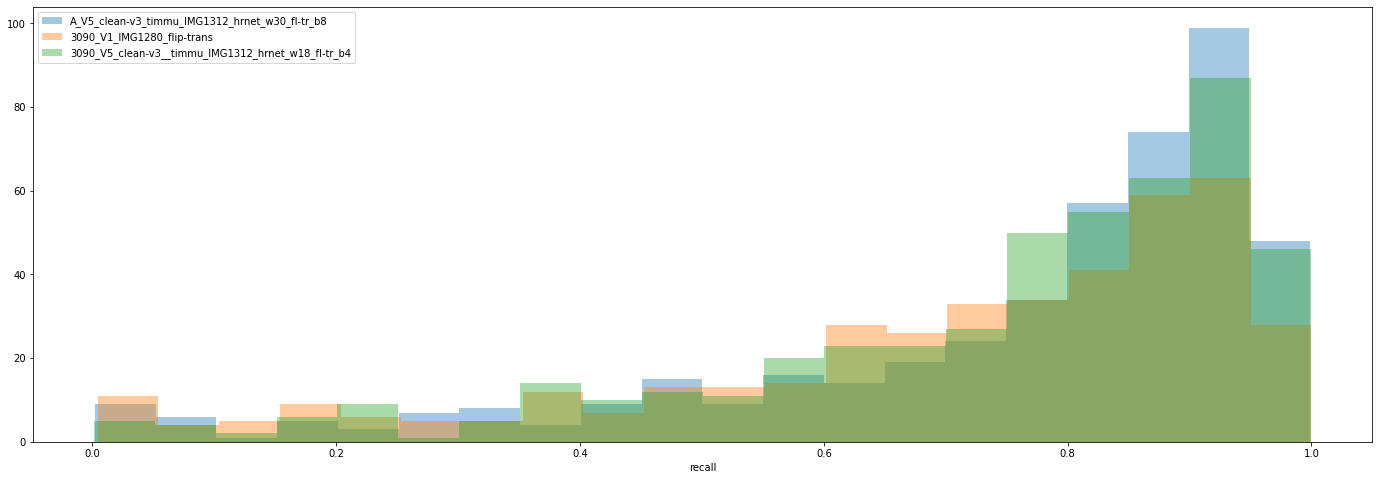

c='flooded building' metrics='recall'


count    2403.000000
mean        0.051360
std         0.175457
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.954063
Name: recall, dtype: float64

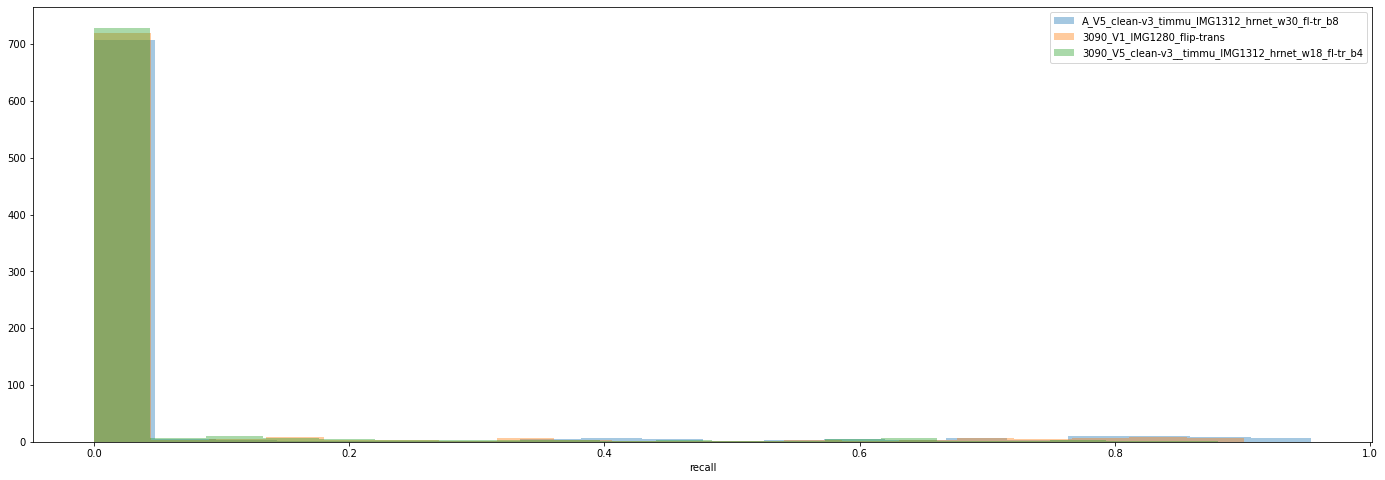

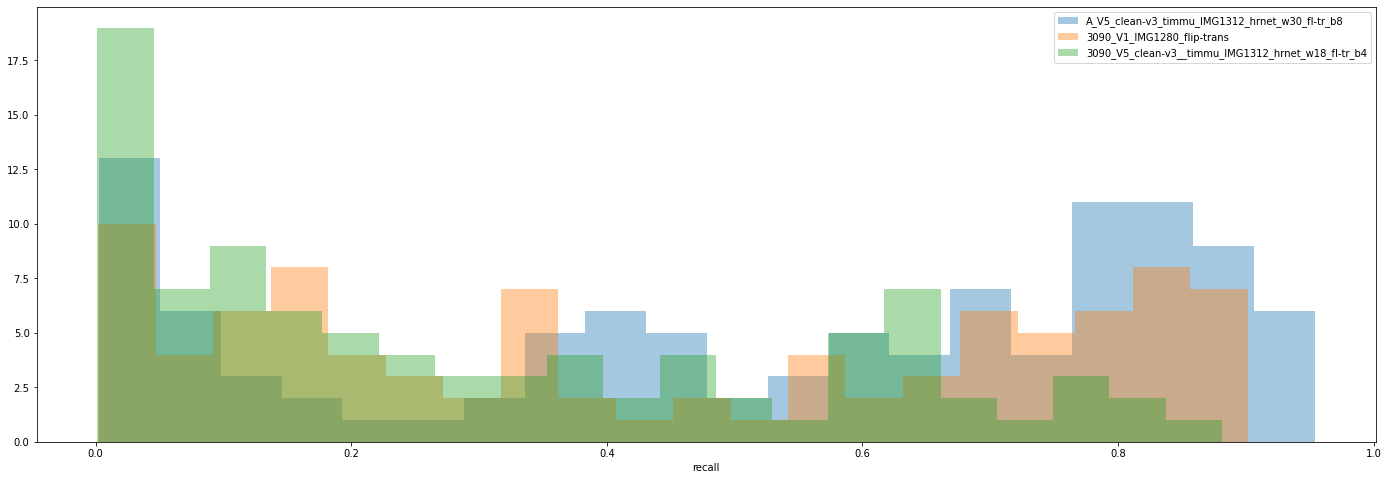

c='non-flooded road' metrics='recall'


count    2403.000000
mean        0.549410
std         0.357581
min         0.000000
25%         0.171725
50%         0.678805
75%         0.861643
max         1.000000
Name: recall, dtype: float64

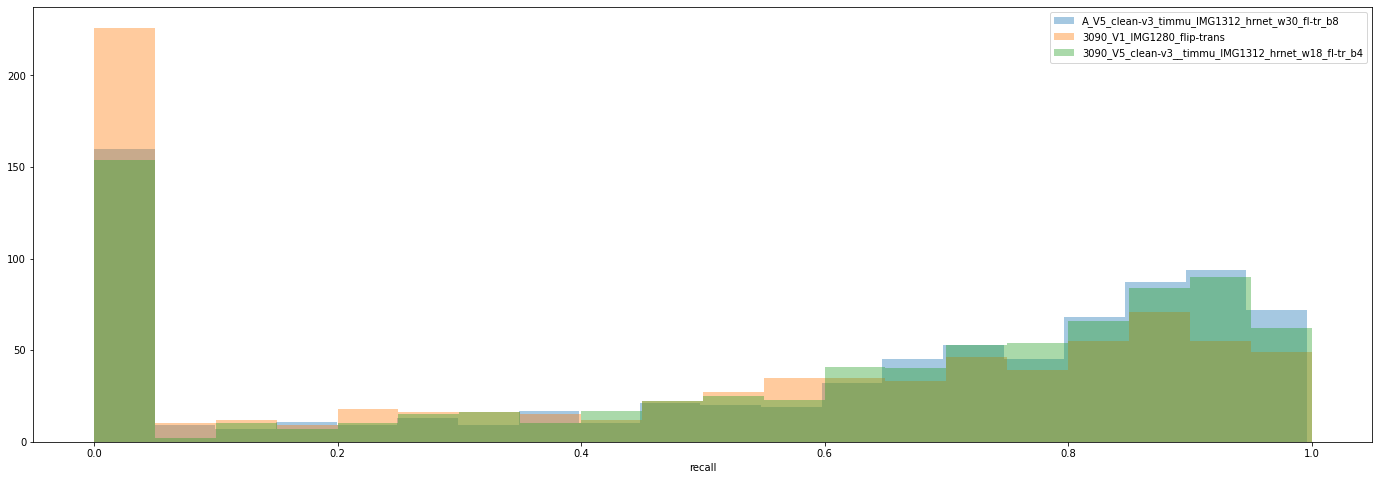

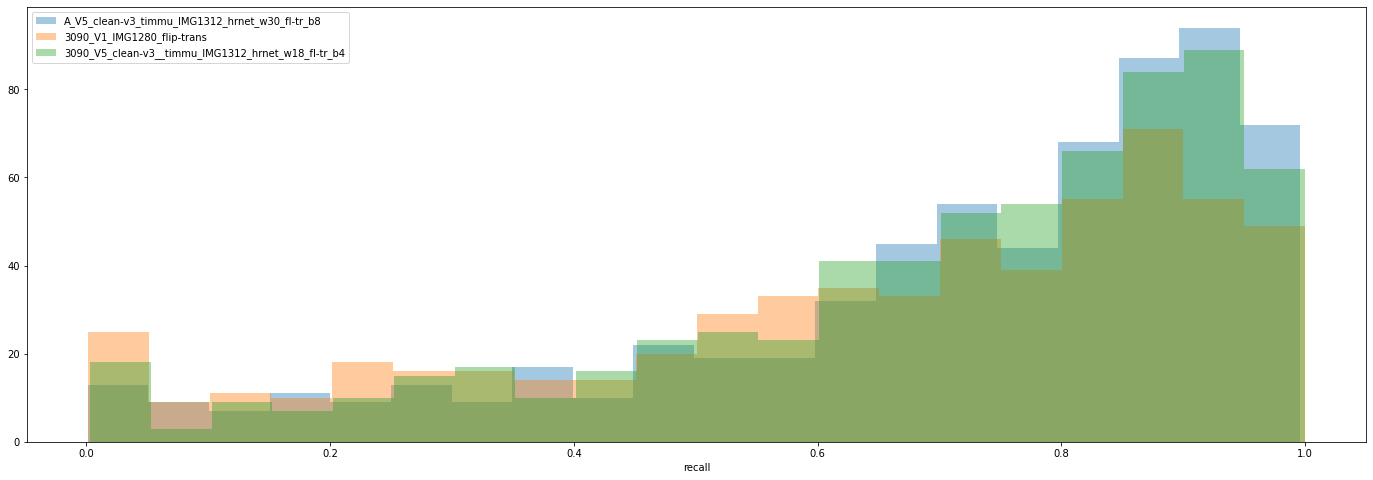

c='flooded road' metrics='recall'


count    2403.000000
mean        0.105129
std         0.251569
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.993631
Name: recall, dtype: float64

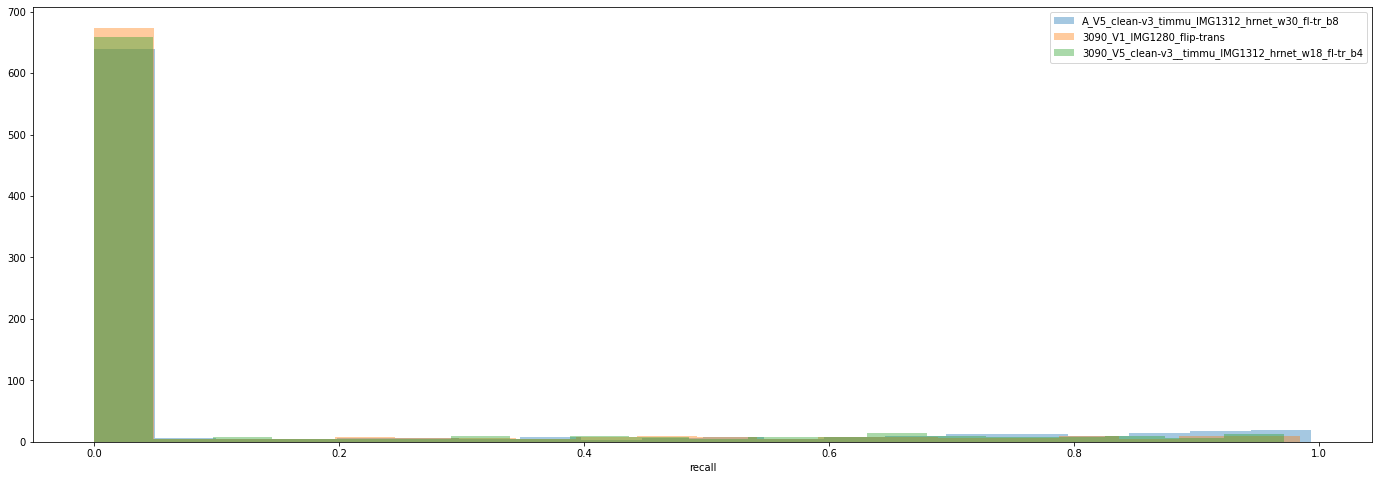

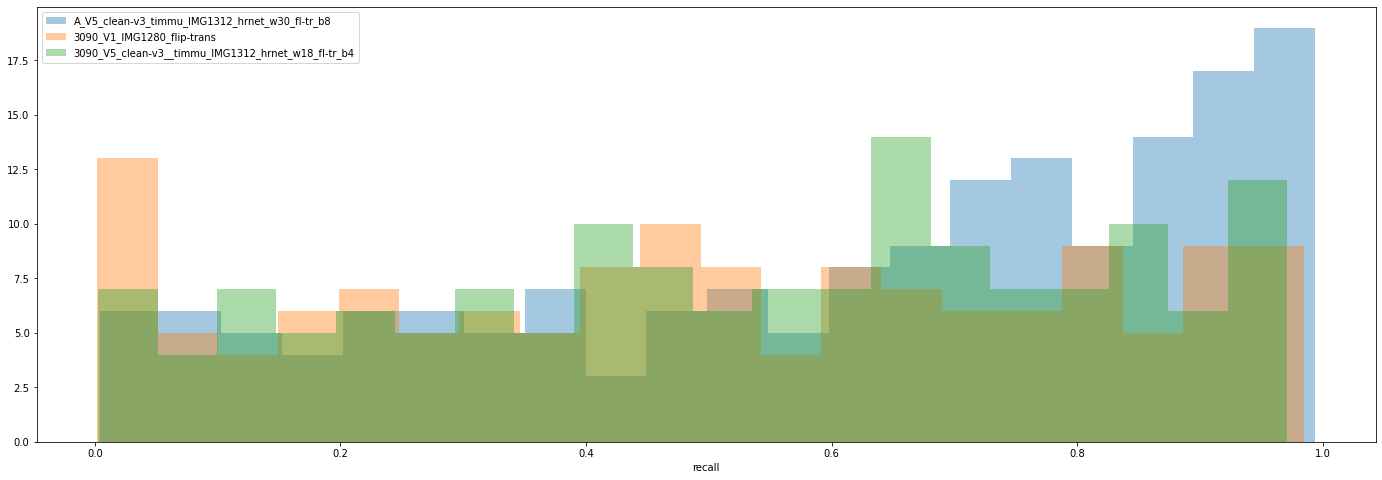

c='non-flooded building' metrics='f1'


count    2403.000000
mean        0.392127
std         0.387726
min         0.000000
25%         0.000000
50%         0.344571
75%         0.803517
max         0.974368
Name: f1, dtype: float64

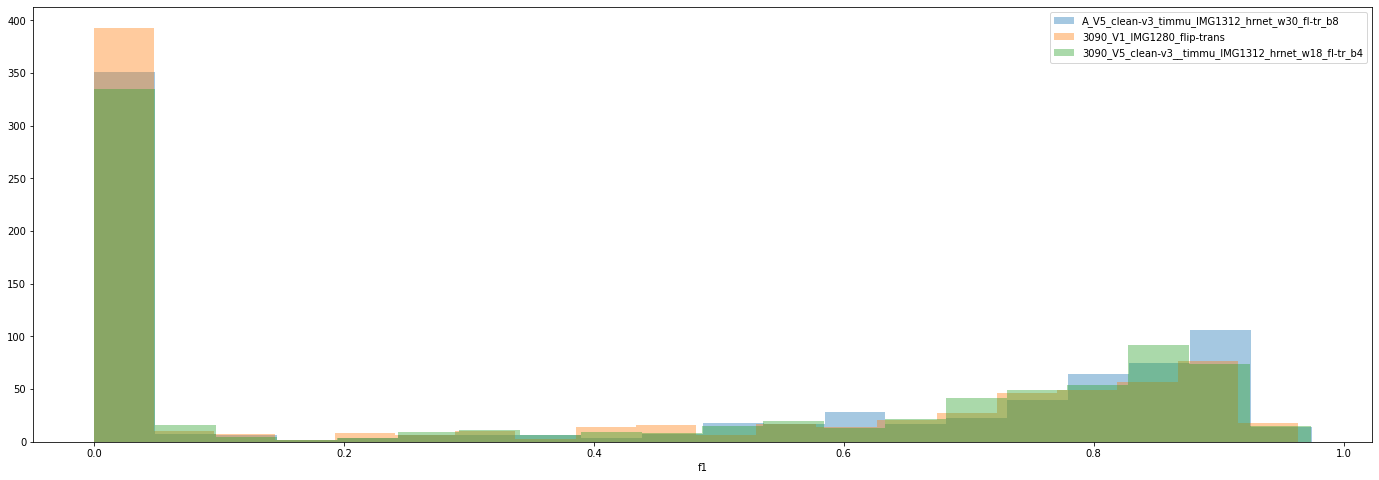

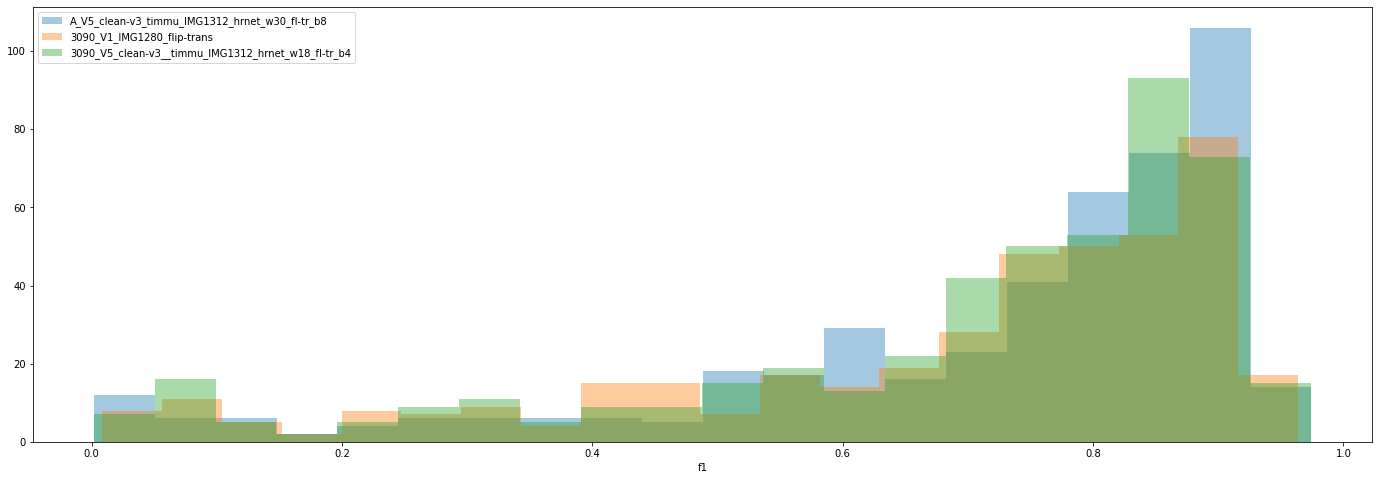

c='flooded building' metrics='f1'


count    2403.000000
mean        0.052238
std         0.171506
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.899982
Name: f1, dtype: float64

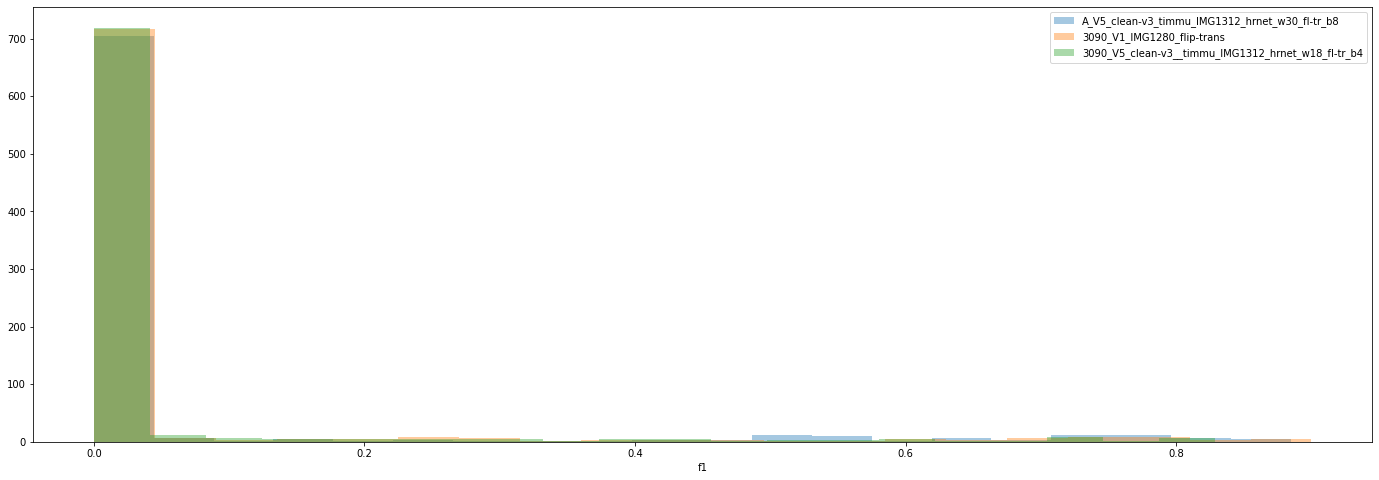

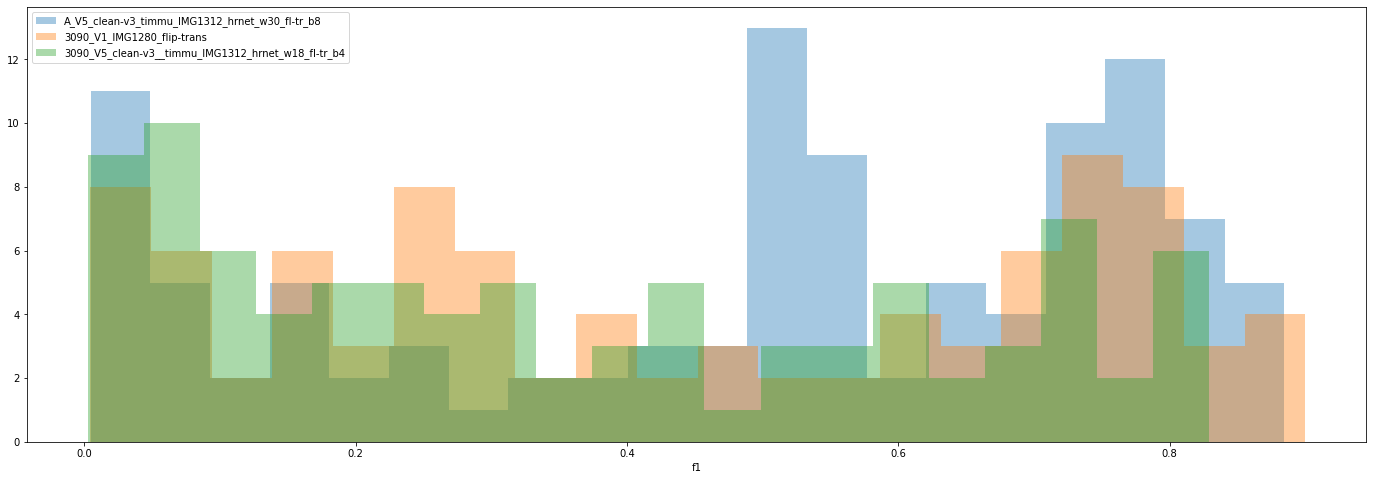

c='non-flooded road' metrics='f1'


count    2403.000000
mean        0.516597
std         0.327303
min         0.000000
25%         0.200822
50%         0.638384
75%         0.793321
max         0.950409
Name: f1, dtype: float64

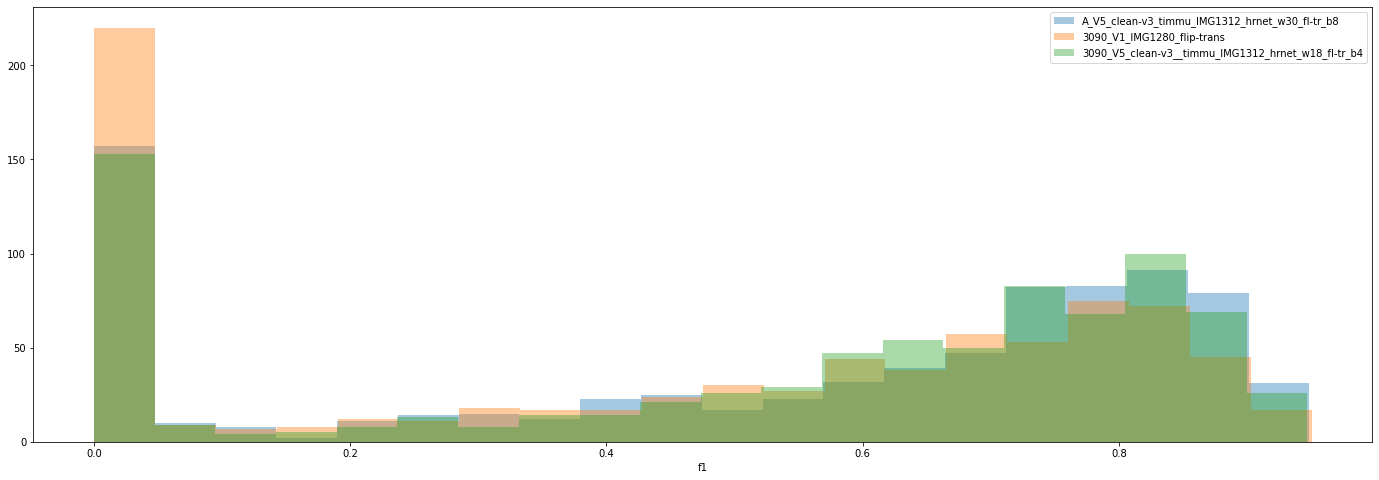

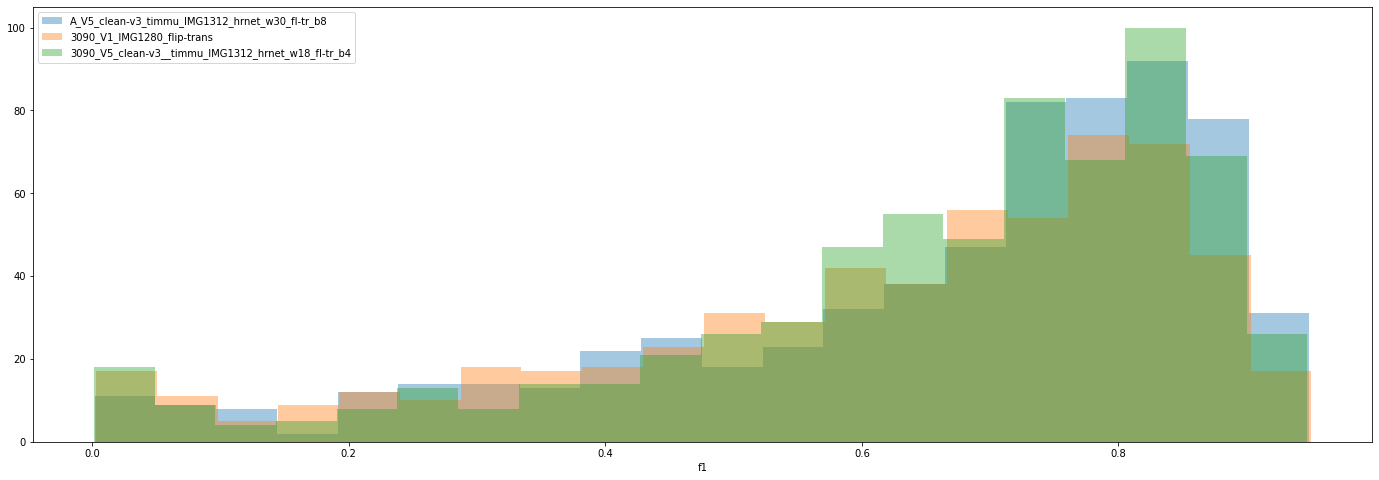

c='flooded road' metrics='f1'


count    2403.000000
mean        0.100723
std         0.233865
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.954504
Name: f1, dtype: float64

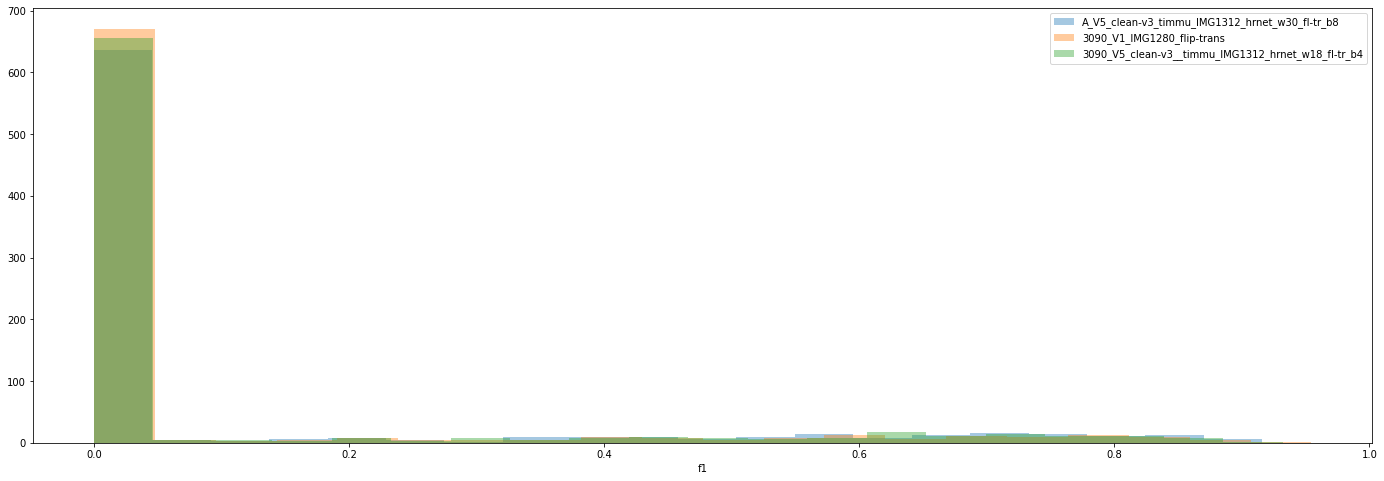

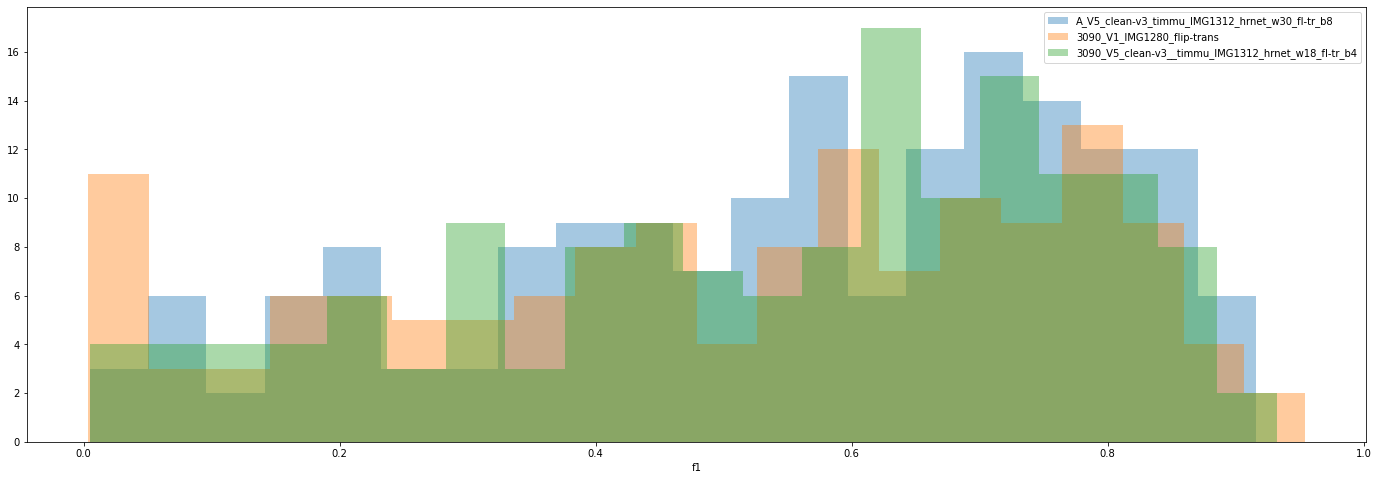

c='non-flooded building' metrics='iou'


count    2403.000000
mean        0.323363
std         0.335136
min         0.000000
25%         0.000000
50%         0.207463
75%         0.670144
max         0.948792
Name: iou, dtype: float64

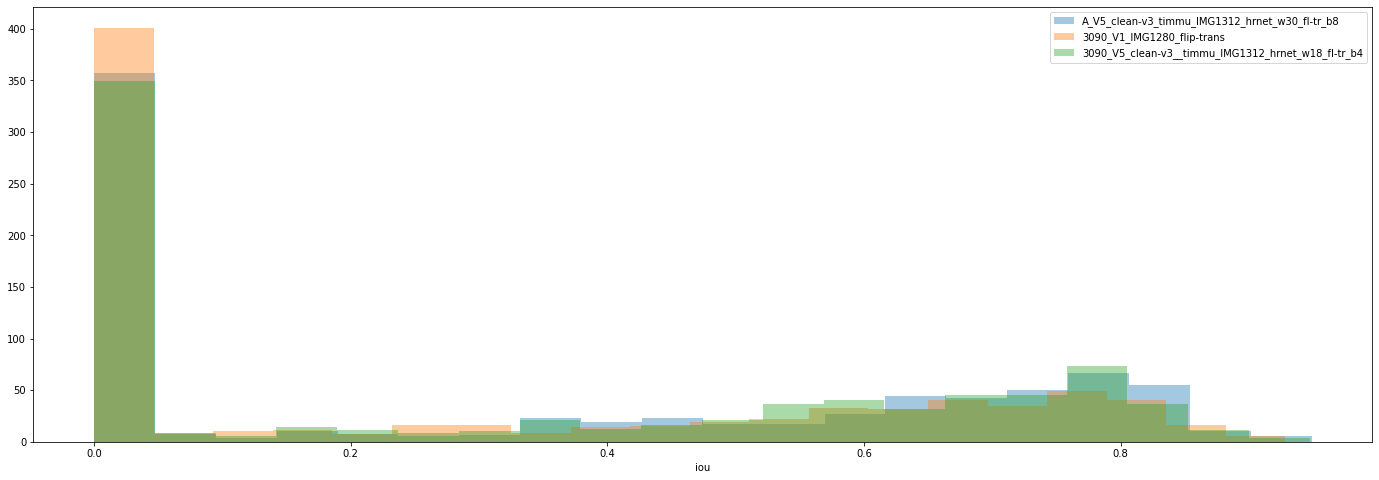

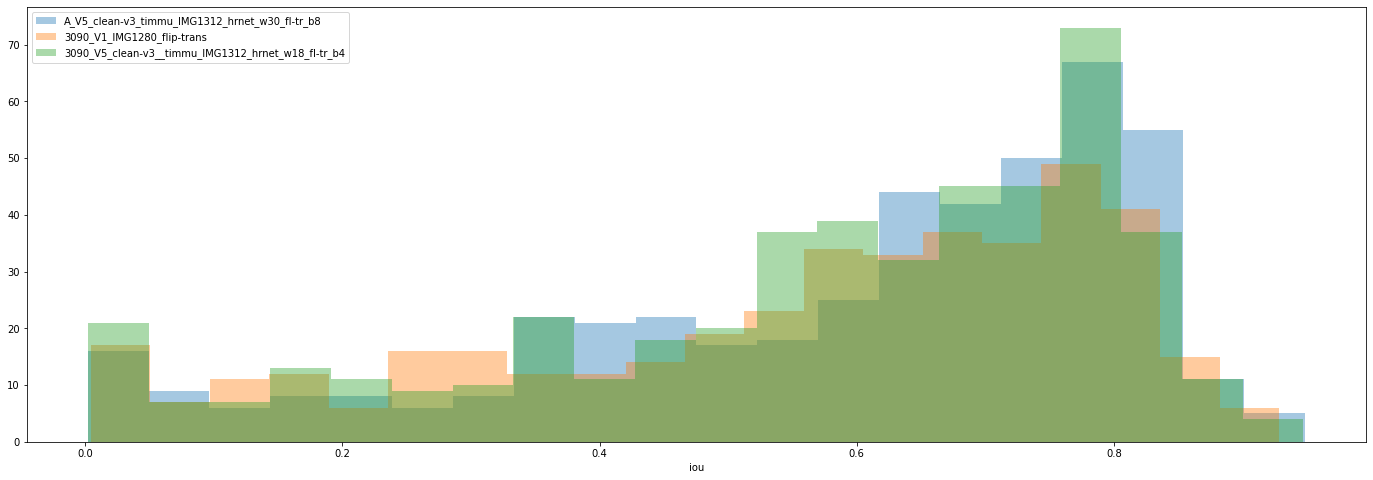

c='flooded building' metrics='iou'


count    2403.000000
mean        0.038424
std         0.133063
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.817387
Name: iou, dtype: float64

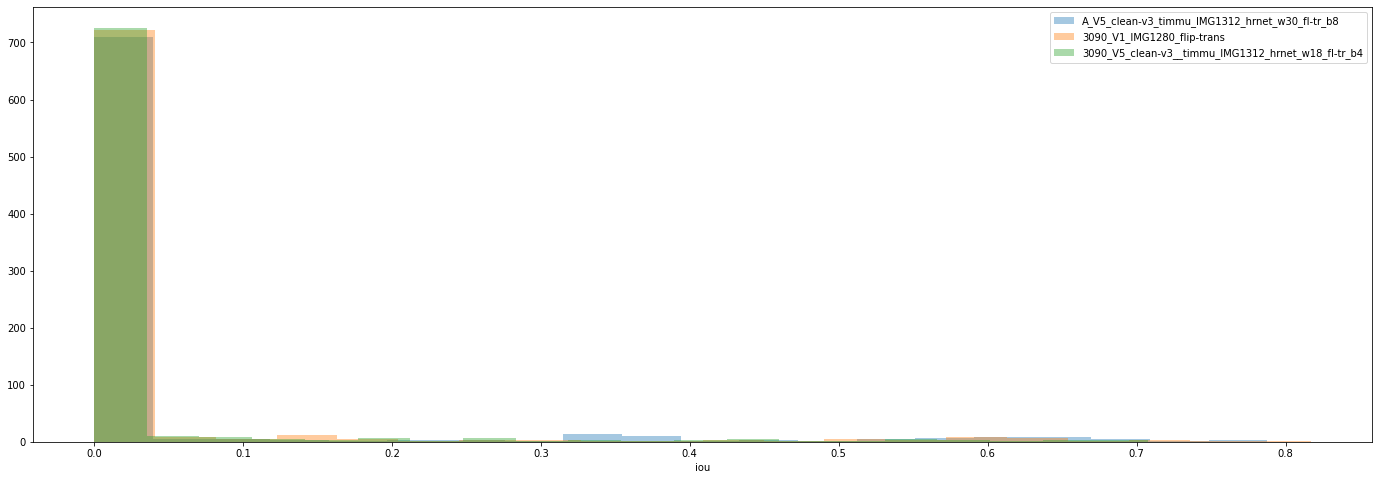

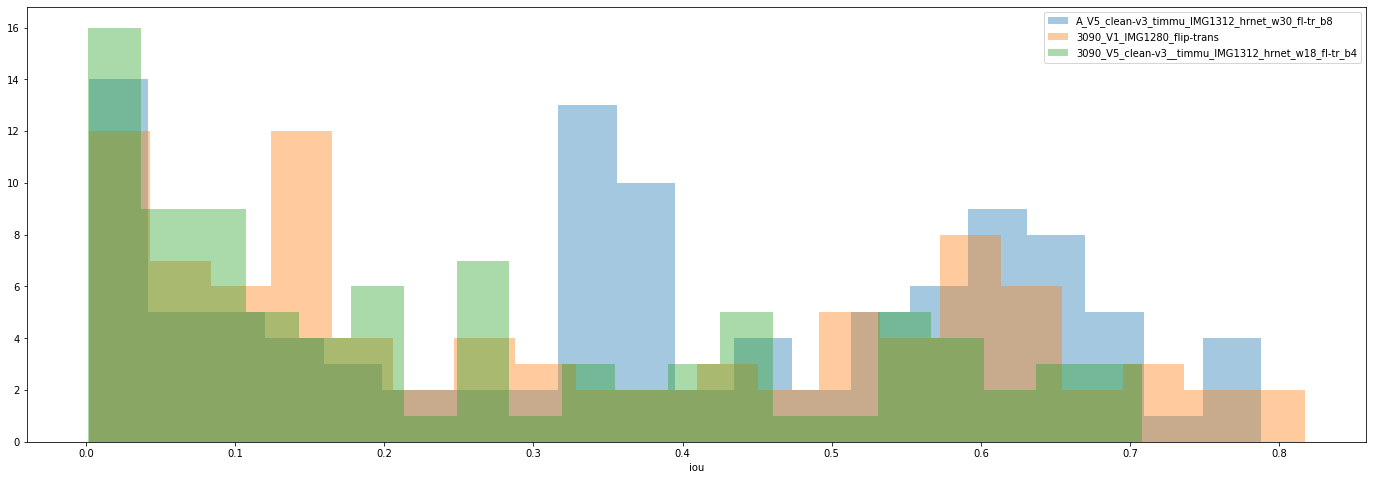

c='non-flooded road' metrics='iou'


count    2403.000000
mean        0.410045
std         0.284598
min         0.000000
25%         0.111546
50%         0.468547
75%         0.657076
max         0.904893
Name: iou, dtype: float64

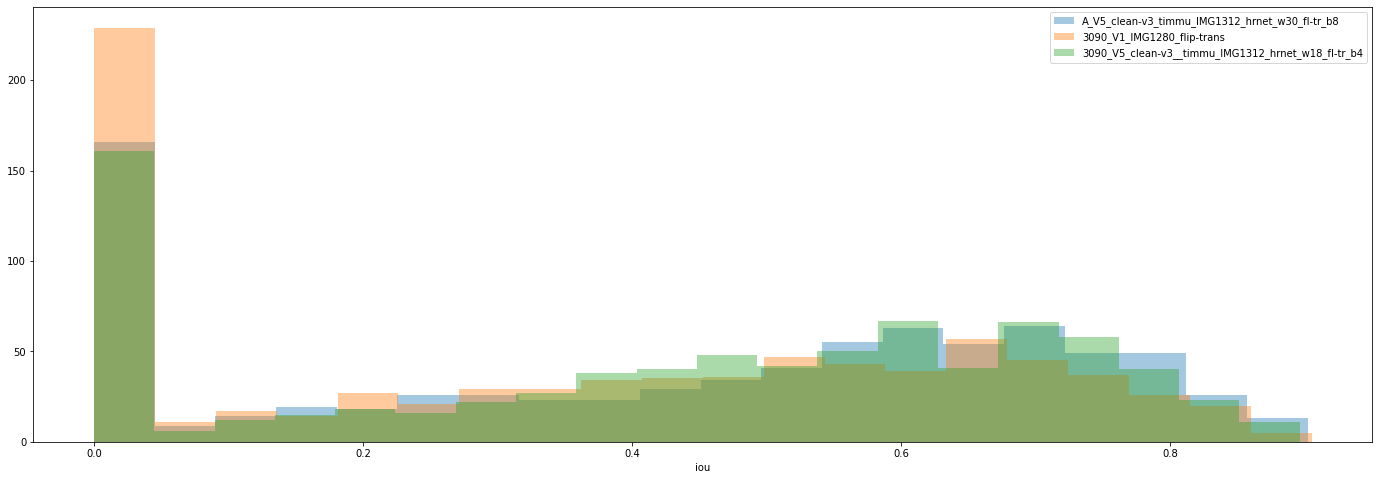

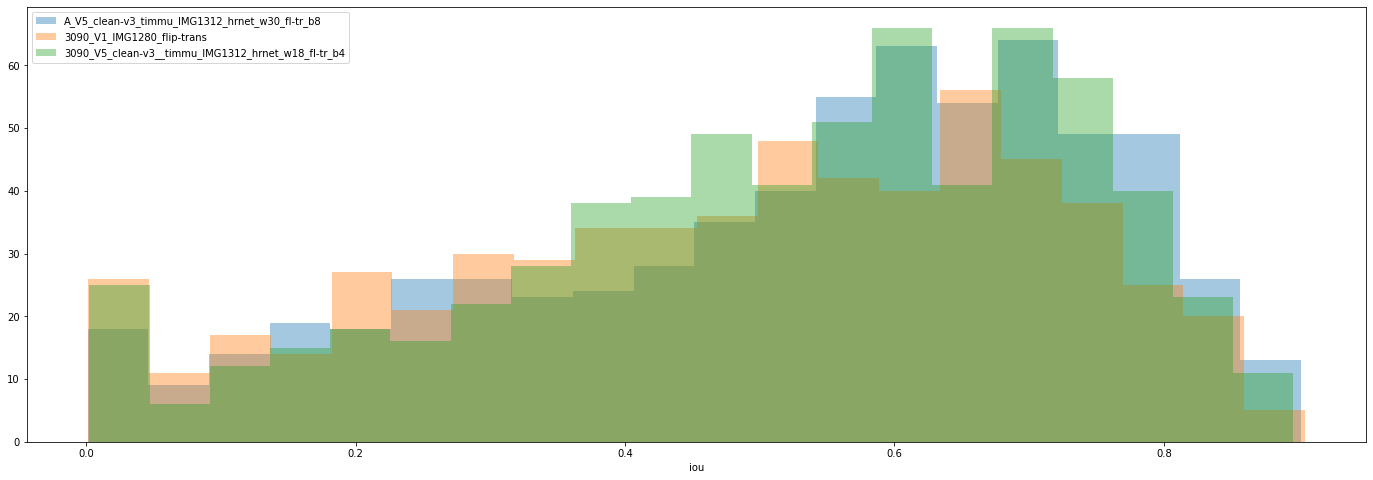

c='flooded road' metrics='iou'


count    2403.000000
mean        0.075453
std         0.183751
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.907353
Name: iou, dtype: float64

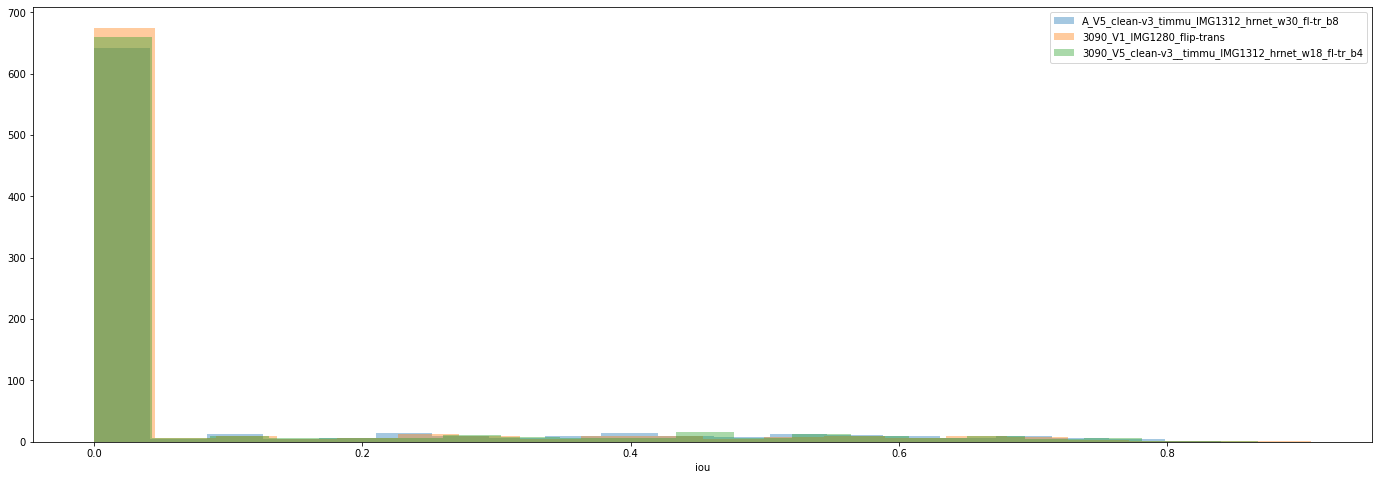

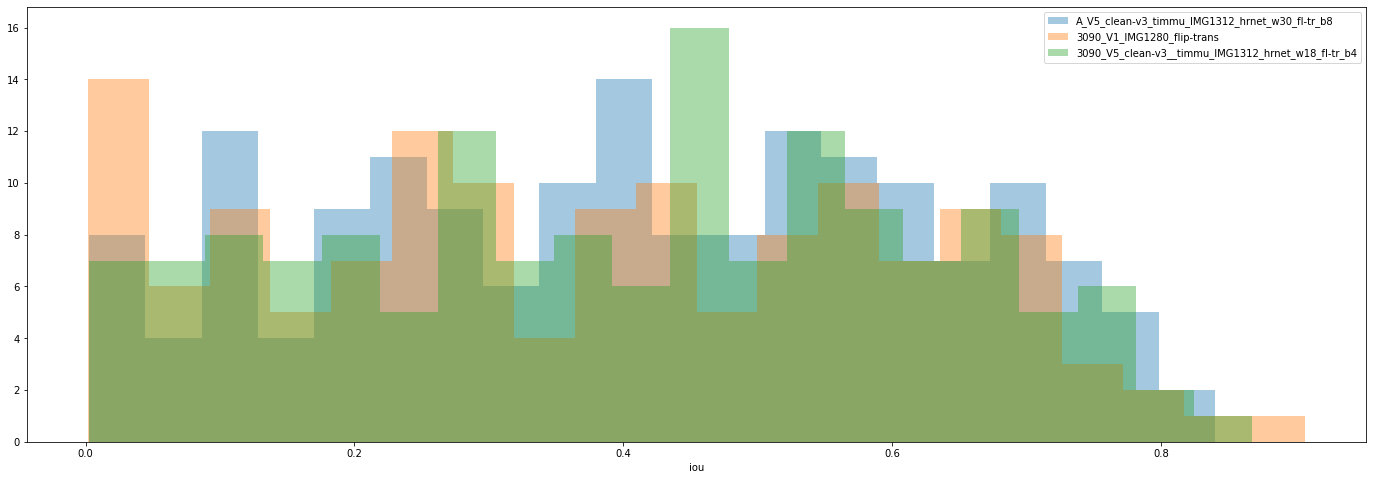

In [62]:
for metrics in METRICSES:
    for c in CHANNELS_FLOOD: 
        _df = df[df['channel'] == c]
        
        print(f'{c=} {metrics=}')
        display(_df[metrics].describe())
        
        plt.figure(figsize=(24, 8))
        for DIR_TARGET in DIR_TARGETS:
            exp = DIR_TARGET.split('/')[-2]
            sns.distplot(_df[_df['exp'] == exp][metrics], kde=False, bins=20, label=exp)
            plt.legend()
        plt.show();
        
        _df_pos = _df[_df[metrics] > 0.001]
        
        plt.figure(figsize=(24, 8))
        for DIR_TARGET in DIR_TARGETS:
            exp = DIR_TARGET.split('/')[-2]
            sns.distplot(_df_pos[_df_pos['exp'] == exp][metrics], kde=False, bins=20, label=exp)
            plt.legend()
        plt.show();